In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [2]:
data = make_blobs(n_samples=400, n_features=2, centers=2, random_state=101)

In [3]:
X, y = data

In [4]:
df = pd.DataFrame(X)

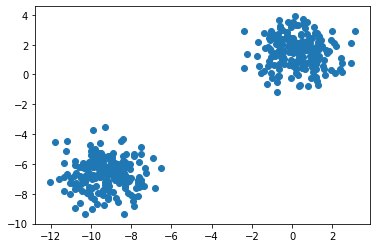

In [5]:
plt.scatter(df[0], df[1])

In [6]:
np.random.seed(seed=101)
z_noise = np.random.random(size=len(X))
z_noise = pd.Series(z_noise)

In [7]:
df = pd.concat([df, z_noise], axis=1)

In [8]:
df.columns = ['X1', 'X2', 'X3']

In [9]:
df

,X1,X2,X3
0,-0.963587,2.414354,0.516399
1,-8.367099,-7.169607,0.570668
2,-1.057406,0.083692,0.028474
3,-8.896157,-5.240260,0.171522
4,-11.339263,-7.836222,0.685277
...,...,...,...
395,-9.817102,-6.960753,0.858825
396,-0.049889,3.368772,0.712005
397,0.655817,2.087837,0.644653
398,-10.043044,-7.589317,0.682120


In [10]:
%matplotlib notebook

In [11]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df['X1'], df['X2'], df['X3'], c=y)

<IPython.core.display.Javascript object>

In [12]:
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

In [13]:
decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [14]:
auto_encoder = Sequential([encoder, decoder])
auto_encoder.compile(loss='mse', optimizer=SGD(lr=1.5))

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(df)
scaler_df.shape

(400, 3)

In [17]:
auto_encoder.fit(scaler_df, scaler_df, epochs=5)

Epoch 1/5
13/13 [==============================] - 0s 732us/step - loss: 0.2699
Epoch 2/5
13/13 [==============================] - 0s 1ms/step - loss: 0.2659
Epoch 3/5
13/13 [==============================] - 0s 932us/step - loss: 0.2665
Epoch 4/5
13/13 [==============================] - 0s 1ms/step - loss: 0.2662
Epoch 5/5
13/13 [==============================] - 0s 1ms/step - loss: 0.2665


In [18]:
encoded_2d = encoder.predict(scaler_df)

In [19]:
encoded_2d.shape

(400, 2)

In [20]:
scaler_df.shape

(400, 3)

In [21]:
plt.scatter(encoded_2d[:,0], encoded_2d[:,1], c=y)

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method